In [1]:
import argparse
from ray.tune import Analysis
import os
import scipy 
import pdb 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#logdir = '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/docking_2d/expr_20210914_005226'
logdir = '/home/vgangal/Downloads/expr_20210914_005226'

In [3]:
all_subdirs = next(os.walk(logdir))[1]

In [4]:
all_subdirs

['PPO_DockingEnv_093d2_00004_4_seed=958191_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00002_2_seed=623778_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00001_1_seed=58773_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00003_3_seed=166_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00006_6_seed=887599_2021-09-14_00-52-29',
 'training_logs',
 'PPO_DockingEnv_093d2_00009_9_seed=222634_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00000_0_seed=0_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00008_8_seed=720211_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00007_7_seed=376759_2021-09-14_00-52-29',
 'PPO_DockingEnv_093d2_00005_5_seed=153558_2021-09-14_00-52-29']

In [5]:
# preprocessing logic 

# keep track of all csv files
csv_file_tracker = []
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        csv_file_tracker.append(csv_path)


In [6]:
data_dfs = [pd.read_csv(csv_file_tracker[i]) for i in range(len(csv_file_tracker))]

Make graphs and visuals of all the data present - use the multiple loop approach from earlier notebook 

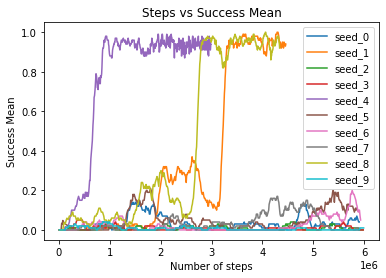

In [7]:
plt.figure()
plt.title('Steps vs Success Mean')
plt.ylabel('Success Mean')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data['custom_metrics/outcome/success_mean']
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1
plt.legend()


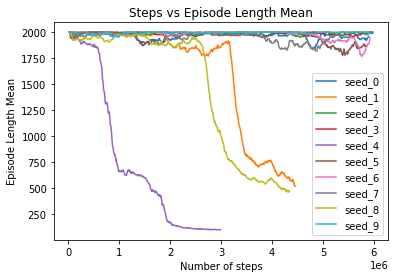

In [8]:
plt.figure()
plt.title('Steps vs Episode Length Mean')
plt.ylabel('Episode Length Mean')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data['episode_len_mean']
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1

plt.legend()


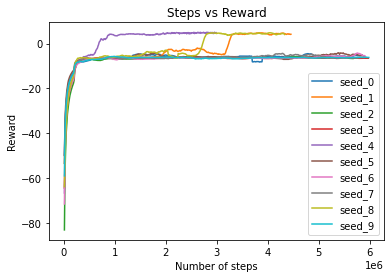

In [9]:
plt.figure()
plt.title('Steps vs Reward')
plt.ylabel('Reward')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data['episode_reward_mean']
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1

plt.legend()


View DataFrames to find dfs that end around 4*10^6 steps

In [12]:
data_dfs[1]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-30.682950,-119.527581,-53.448189,2001.00,6,6,12006,False,6,1,...,7.593333,0.20,0.00005,0.381500,-0.031722,0.409837,0.921484,0.016925,4.778007,0.0
1,-19.027175,-119.527581,-44.433108,2001.00,6,6,24012,False,12,2,...,7.692308,0.20,0.00005,0.134589,-0.036798,0.166635,0.887825,0.023759,4.754890,0.0
2,-16.294055,-119.527581,-36.458477,2001.00,6,6,36018,False,18,3,...,7.671429,0.30,0.00005,0.138215,-0.021706,0.155922,0.736619,0.013330,4.758663,0.0
3,-10.627062,-119.527581,-32.802537,2001.00,6,6,48024,False,24,4,...,7.600000,0.30,0.00005,0.078805,-0.030666,0.104598,0.942893,0.016242,4.739712,0.0
4,-10.627062,-119.527581,-29.102316,2001.00,6,6,60030,False,30,5,...,7.600000,0.30,0.00005,0.311732,-0.017673,0.325694,0.423545,0.012372,4.741544,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5.544034,-1.807273,4.178733,548.77,12,6,4430227,False,3344,496,...,7.500000,0.45,0.00005,0.105011,-0.045071,0.143989,0.910931,0.013540,2.115183,0.0
496,5.385673,-1.807273,4.140590,532.88,13,6,4436514,False,3357,497,...,7.328571,0.45,0.00005,0.115805,-0.042367,0.153185,0.899622,0.011081,2.260009,0.0
497,5.385673,-1.807273,4.125181,526.28,14,6,4443650,False,3371,498,...,7.100000,0.45,0.00005,0.127510,-0.036173,0.159125,0.893732,0.010130,2.303394,0.0
498,5.316990,-1.807273,4.072032,524.19,12,6,4450160,False,3383,499,...,7.137500,0.45,0.00005,-0.023960,-0.047565,0.017856,0.988090,0.012775,2.258031,0.0


In [13]:
data_dfs[3]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-39.699647,-112.287565,-64.461975,2001.000000,6,6,12006,False,6,1,...,7.593750,0.20,0.00005,0.716252,-0.031912,0.743984,0.807902,0.020902,4.774554,0.0
1,-17.823113,-112.287565,-44.396613,2001.000000,6,6,24012,False,12,2,...,7.700000,0.30,0.00005,0.160388,-0.034713,0.188716,0.784101,0.021284,4.759869,0.0
2,-17.823113,-112.287565,-39.387978,2001.000000,6,6,36018,False,18,3,...,7.669231,0.45,0.00005,0.101604,-0.020536,0.117785,0.922337,0.009678,4.752088,0.0
3,-3.764159,-112.287565,-33.880358,1944.208333,6,6,46661,False,24,4,...,7.597436,0.45,0.00005,0.090498,-0.030271,0.114696,0.851361,0.013496,4.739414,0.0
4,-3.764159,-112.287565,-30.556183,1955.566667,6,6,58667,False,30,5,...,7.600000,0.45,0.00005,0.352593,-0.014233,0.362675,0.406028,0.009224,4.741337,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-5.995088,-7.420845,-6.526258,2001.000000,6,6,5929770,False,2976,496,...,5.800000,0.45,0.00005,0.386106,-0.042957,0.422265,0.234658,0.015105,3.349242,0.0
496,-5.939223,-7.420845,-6.517954,2001.000000,6,6,5941776,False,2982,497,...,5.800000,0.45,0.00005,0.369518,-0.037544,0.401247,0.284343,0.012921,3.308128,0.0
497,-5.939223,-7.420845,-6.517416,2001.000000,6,6,5953782,False,2988,498,...,5.800000,0.45,0.00005,0.354555,-0.043947,0.391614,0.289599,0.015305,3.370400,0.0
498,-5.939223,-7.420845,-6.532498,2001.000000,6,6,5965788,False,2994,499,...,5.800000,0.45,0.00005,0.393181,-0.040576,0.426777,0.222673,0.015513,3.411287,0.0


In [ ]:
data_dfs[8]

In [ ]:
data_dfs[8].columns

In [ ]:
# find the set of unique x values i.e. timestep data 
key_timesteps = 'timesteps_total'
timesteps_total_track = []
for ds in data_dfs: 
    for i in range(ds.shape[0]):                
        timestep_total = ds.iloc[[i]][key_timesteps][i]
        timesteps_total_track.append(timestep_total)

timesteps = np.array(timesteps_total_track)
unique_timesteps = np.unique(timesteps) 

In [ ]:
#view intermediate results 
print(unique_timesteps)
print(unique_timesteps.max())
print(unique_timesteps.min())
print("range:",unique_timesteps.max() - unique_timesteps.min())

In [ ]:
# interpolate each experiment's data over that set of unique x values 

In [ ]:
clipped_timesteps = data_dfs[8]['timesteps_total']

#   Create logic to determine clipping point, use graph for aid, but code should be graph              independent.

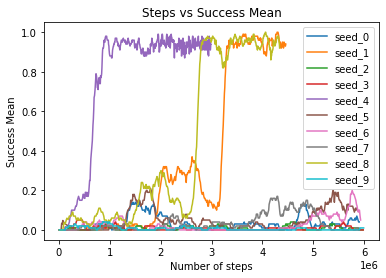

In [14]:
plt.figure()
plt.title('Steps vs Success Mean')
plt.ylabel('Success Mean')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data['custom_metrics/outcome/success_mean']
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1
plt.legend()


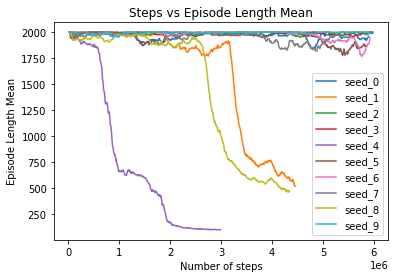

In [15]:
plt.figure()
plt.title('Steps vs Episode Length Mean')
plt.ylabel('Episode Length Mean')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data['episode_len_mean']
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1

plt.legend()


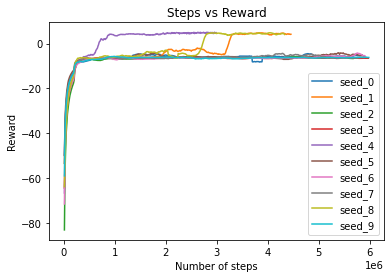

In [16]:
plt.figure()
plt.title('Steps vs Reward')
plt.ylabel('Reward')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data['episode_reward_mean']
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1

plt.legend()


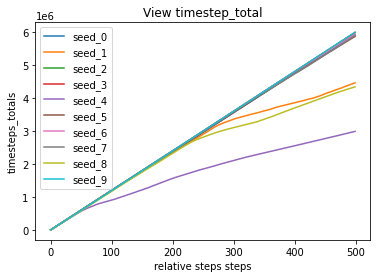

In [54]:
# make a graph of all the timestep_totals
plt.figure()
plt.title('View timestep_total')
plt.ylabel('timesteps_totals')
plt.xlabel('relative steps steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        plt.plot(steps,label=seed_name)
        seed = seed + 1
plt.legend()


In [ ]:

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        plt.plot(steps,label=seed_name)
        seed = seed + 1


In [18]:
data_dfs[8]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-48.207050,-99.033163,-63.849344,2001.000000,6,6,12006,False,6,1,...,7.593750,0.200,0.00005,0.324407,-0.031593,0.352473,0.900004,0.017635,4.777825,0.0
1,-17.665185,-105.959352,-53.722568,2001.000000,6,6,24012,False,12,2,...,7.700000,0.200,0.00005,0.095962,-0.043587,0.133216,0.965417,0.031660,4.744387,0.0
2,-16.497785,-105.959352,-42.643322,2001.000000,6,6,36018,False,18,3,...,7.650000,0.300,0.00005,0.258519,-0.023362,0.277971,0.513029,0.013035,4.746664,0.0
3,-9.153922,-105.959352,-35.900130,1983.041667,6,6,47593,False,24,4,...,7.597297,0.300,0.00005,0.252005,-0.017314,0.265577,0.411894,0.012471,4.737663,0.0
4,-9.153922,-105.959352,-31.600219,1986.633333,6,6,59599,False,30,5,...,7.600000,0.300,0.00005,0.324753,-0.017972,0.339129,0.378138,0.011985,4.722757,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5.411757,-2.102182,4.375372,463.230000,12,6,4313256,False,3874,496,...,7.500000,0.675,0.00005,0.137301,-0.043307,0.173093,0.884456,0.011132,2.670125,0.0
496,5.411757,-1.743904,4.362441,466.100000,12,6,4318768,False,3886,497,...,7.500000,0.675,0.00005,0.209651,-0.044334,0.247963,0.844599,0.008921,2.626629,0.0
497,5.411757,-1.743904,4.239294,464.600000,12,6,4324791,False,3898,498,...,7.500000,0.675,0.00005,0.214738,-0.046540,0.253930,0.822711,0.010884,2.500805,0.0
498,5.411757,-2.284935,4.188369,477.660000,12,6,4330794,False,3910,499,...,7.500000,0.675,0.00005,0.150914,-0.046070,0.191267,0.868472,0.008471,2.539498,0.0


In [19]:
data_dfs[0]

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-31.168506,-77.906335,-49.736497,2001.000,6,6,12006,False,6,1,...,7.593333,0.200,0.00005,0.322103,-0.030400,0.348312,0.840750,0.020955,4.772894,0.0
1,-17.881639,-77.906335,-36.322374,2001.000,6,6,24012,False,12,2,...,7.692857,0.300,0.00005,0.179193,-0.028384,0.202550,0.739359,0.016758,4.761655,0.0
2,-15.191219,-77.906335,-30.333687,2001.000,6,6,36018,False,18,3,...,7.664286,0.300,0.00005,0.266664,-0.024471,0.286718,0.479212,0.014722,4.753848,0.0
3,-9.040686,-77.906335,-25.888650,1997.125,6,6,47931,False,24,4,...,7.597500,0.300,0.00005,0.307809,-0.014616,0.318641,0.327737,0.012613,4.742004,0.0
4,-9.040686,-77.906335,-23.198241,1997.900,6,6,59937,False,30,5,...,7.600000,0.300,0.00005,0.347905,-0.015688,0.359680,0.341198,0.013042,4.730353,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5.383046,-6.307520,-5.182663,1921.370,6,6,5851222,False,2976,496,...,6.600000,0.675,0.00005,0.441560,-0.034600,0.469229,0.282605,0.010267,3.148939,0.0
496,5.383046,-6.307520,-5.299363,1934.110,6,6,5863228,False,2982,497,...,6.500000,0.675,0.00005,0.422716,-0.036679,0.451285,0.197776,0.012014,3.104880,0.0
497,5.383046,-6.330908,-5.414136,1944.650,6,6,5875234,False,2988,498,...,6.500000,0.675,0.00005,0.402646,-0.030415,0.426172,0.238757,0.010206,3.065582,0.0
498,5.383046,-6.330908,-5.535183,1956.320,6,6,5887240,False,2994,499,...,6.500000,0.675,0.00005,0.386314,-0.030196,0.409749,0.270084,0.010016,3.028818,0.0


In [ ]:
perform_clipping = False
i = 0
max_timestep = 0
for ds in data_dfs:
    check_pos = ds.shape[0] -1
    current_max_timesteps = ds.iloc[[check_pos]]['timesteps_total']
    if i == 0:
        max_timestep = current_max_timesteps
    else:
        if max_timestep != current_max_timesteps:
            perform_clipping = True
            break


In [22]:
data_dfs[0].iloc[[data_dfs[0].shape[0]-1]]['timesteps_total']

499    5899246
Name: timesteps_total, dtype: int64

In [23]:
data_dfs[1].iloc[[data_dfs[1].shape[0]-1]]['timesteps_total']

499    4456901
Name: timesteps_total, dtype: int64

In [24]:
data_dfs[2].iloc[[data_dfs[2].shape[0]-1]]['timesteps_total']

499    5973618
Name: timesteps_total, dtype: int64

In [26]:
data_dfs[3].iloc[[data_dfs[3].shape[0]-1]]['timesteps_total']

499    5977794
Name: timesteps_total, dtype: int64

In [27]:
data_dfs[3].iloc[[data_dfs[3].shape[0]-1]]['timesteps_total']

499    5977794
Name: timesteps_total, dtype: int64

In [28]:
data_dfs[4].iloc[[data_dfs[4].shape[0]-1]]['timesteps_total']

499    2989194
Name: timesteps_total, dtype: int64

In [30]:
data_dfs[5].iloc[[data_dfs[5].shape[0]-1]]['timesteps_total']

499    5855229
Name: timesteps_total, dtype: int64

In [31]:
data_dfs[6].iloc[[data_dfs[6].shape[0]-1]]['timesteps_total']

499    5925720
Name: timesteps_total, dtype: int64

In [32]:
data_dfs[7].iloc[[data_dfs[7].shape[0]-1]]['timesteps_total']

499    5890566
Name: timesteps_total, dtype: int64

In [34]:
data_dfs[8].iloc[[data_dfs[8].shape[0]-1]]['timesteps_total']

499    4335940
Name: timesteps_total, dtype: int64

In [35]:
data_dfs[9].iloc[[data_dfs[9].shape[0]-1]]['timesteps_total']

499    5985286
Name: timesteps_total, dtype: int64

In [52]:
per_df_max_timesteps = [ds.iloc[[data_dfs[9].shape[0]-1]]['timesteps_total'] for ds in data_dfs]

KeyError: 0

In [51]:
type(per_df_max_timesteps[0][0])

numpy.int64

In [41]:
max_df_total_timesteps = np.argmax(per_df_max_timesteps)

In [45]:
min_df_total_timesteps = np.argmin(per_df_max_timesteps)

In [46]:
max_df_total_timesteps

9

In [47]:
min_df_total_timesteps

4

In [49]:
per_df_max_timesteps = np.array(per_df_max_timesteps)
per_df_max_timesteps.mean()

5328949.4

## End - logic to determine clipping points 

In [ ]:
from scipy import interpolate
sns.set_theme()

In [ ]:
key_timesteps = 'timesteps_total'
key_eps_len_mean = 'episode_len_mean'
key_success_mean = 'custom_metrics/outcome/success_mean'
key_eps_reward_mean = 'episode_reward_mean'


In [ ]:
timesteps_total_track = []
episode_len_mean_track = []
success_mean_track = []
eps_reward_mean_track = []

# dont need to walk through step by step , can just grab columns 
for ds in data_dfs:                 
    timestep_total = ds[key_timesteps]
    episode_len_mean = ds[key_eps_len_mean]
    success_mean = ds[key_success_mean]
    reward_mean = ds[key_eps_reward_mean]
        
    # interpolation functions
    func_time_v_eps_len = interpolate.interp1d(timestep_total,episode_len_mean,fill_value='extrapolate')
    func_time_v_success = interpolate.interp1d(timestep_total,success_mean,fill_value='extrapolate')
    func_time_v_reward = interpolate.interp1d(timestep_total,reward_mean,fill_value='extrapolate')
    interp_eps_len = func_time_v_eps_len(clipped_timesteps)
    interp_success = func_time_v_success(clipped_timesteps)
    interp_reward = func_time_v_reward(clipped_timesteps)
        
    for i in clipped_timesteps:
        timesteps_total_track.append(i)
    for i in interp_eps_len: 
        episode_len_mean_track.append(i)
    for i in interp_success: 
        success_mean_track.append(i)
    for i in interp_reward: 
        eps_reward_mean_track.append(i)


In [ ]:
sns.set_theme()
sns.set(font_scale=1.5)
timesteps_total_v_episode_len_mean = pd.DataFrame()
timesteps_total_v_episode_len_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_episode_len_mean[key_eps_len_mean] = episode_len_mean_track

In [ ]:
episode_mean_len_plot = sns.relplot(data=timesteps_total_v_episode_len_mean,x='timesteps_total',y='episode_len_mean',kind='line')
episode_mean_len_plot.set_axis_labels("Timesteps","Episode Length")


In [ ]:
timesteps_total_v_success_mean = pd.DataFrame()
timesteps_total_v_success_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_success_mean['success_mean'] = success_mean_track

In [ ]:
success_mean_plot = sns.relplot(data=timesteps_total_v_success_mean,x='timesteps_total',y='success_mean',kind='line')
success_mean_plot.set_axis_labels("Timesteps","Success Rate") 

In [ ]:
timesteps_total_v_episode_reward_mean = pd.DataFrame()
timesteps_total_v_episode_reward_mean[key_timesteps] = timesteps_total_track
timesteps_total_v_episode_reward_mean['episode_reward_mean'] = eps_reward_mean_track

In [ ]:
reward_plot = sns.relplot(data=timesteps_total_v_episode_reward_mean,x='timesteps_total',y='episode_reward_mean',kind='line')
reward_plot.set_axis_labels("Timesteps","Average Return")

In [ ]:
episode_mean_len_plot.savefig('docking2d_eps_len_plot.png',dpi=1200)
success_mean_plot.savefig('docking2d_success_mean.png',dpi=1200)
reward_plot.savefig('docking2d_reward_graph.png',dpi=1200)

## Constraint Violation Ratio Mean Graph

In [ ]:
key_timesteps = 'timesteps_total'
key_const_viol = 'custom_metrics/constraint_violation.max_vel_constraint.ratio_mean'


In [ ]:
plt.figure()
plt.title('Steps vs Ratio Mean Constraint Violation')
plt.ylabel('Ration Mean Constraint Violation')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data[key_const_viol]
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1

plt.legend()


In [ ]:

timesteps_total_track = []
const_viol_ratio_track = []

# dont need to walk through step by step , can just grab columns 
for ds in data_dfs: 
        timestep_total = ds[key_timesteps]
        const_viol_ratio = ds[key_const_viol]
        # interpolation functions
        func_time_v_constraint = interpolate.interp1d(timestep_total,const_viol_ratio,fill_value='extrapolate')
        interp_eps_len = func_time_v_constraint(clipped_timesteps)
        
        for i in clipped_timesteps:
            timesteps_total_track.append(i)
        for i in const_viol_ratio: 
            const_viol_ratio_track.append(i)

In [ ]:
timesteps_total_v_constr_viol = pd.DataFrame()
timesteps_total_v_constr_viol[key_timesteps] = timesteps_total_track
timesteps_total_v_constr_viol['constr_viol'] = const_viol_ratio_track

In [ ]:
sns.set_theme()
sns.set(font_scale=1.5)
constr_viol_plot = sns.relplot(data=timesteps_total_v_constr_viol,x='timesteps_total',y='constr_viol',kind='line')
constr_viol_plot.set_axis_labels("Timesteps","Constraint Violation Ratio")

In [ ]:
constr_viol_plot.savefig('docking2d_constraint_violation.png',dpi=1200)

## Graph - delta v vs timesteps

In [ ]:
data_dfs[0].columns

In [ ]:
key_delta_v = 'custom_metrics/delta_v_total_mean'

In [ ]:
plt.figure()
plt.title('Steps vs Delta V')
plt.ylabel('Delta V ')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data[key_delta_v]
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1

plt.legend()


In [ ]:
data_dfs[0][key_delta_v].min()

In [ ]:
data_dfs[0][key_delta_v].max()

In [ ]:
clipped_timesteps = data_dfs[8]['timesteps_total']
timesteps_total_track = []
delta_v_track = []

# dont need to walk through step by step , can just grab columns 
for ds in data_dfs: 
        timestep_total = ds[key_timesteps]
        delta_v_mean = ds[key_delta_v]
        # interpolation functions
        func_time_v_constraint = interpolate.interp1d(timestep_total,delta_v_mean,fill_value='extrapolate')
        interp_delta_v = func_time_v_constraint(clipped_timesteps)
        
        for i in clipped_timesteps:
            timesteps_total_track.append(i)
        for i in interp_delta_v: 
            delta_v_track.append(i)

In [ ]:
timesteps_total_v_constr_viol = pd.DataFrame()
timesteps_total_v_constr_viol[key_timesteps] = timesteps_total_track
timesteps_total_v_constr_viol['delta_v'] = delta_v_track

In [ ]:
sns.set_theme()
sns.set(font_scale=1.5)
deltav_plot = sns.relplot(data=timesteps_total_v_constr_viol,x='timesteps_total',y='delta_v',kind='line')
deltav_plot.set_axis_labels("Timesteps","Delta V")

In [ ]:
deltav_plot.savefig('docking2d_delta_v.png',dpi=1200)